# Create a test.csv from train.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import os
from pathlib import Path
from sklearn.model_selection import train_test_split


#### Data Preprocessing

In [4]:
cwd_path = Path.cwd()
metadata_path = cwd_path.parent.joinpath("../image_data/CheXpert-v1.0-small/train.csv")
val_path = cwd_path.parent.joinpath("../image_data/CheXpert-v1.0-small/valid.csv")
train_og = pd.read_csv(metadata_path)
print(f"Len train: {len(train_og)}")
val_og = pd.read_csv(val_path)
print(f"Len val: {len(val_og)}")
metadata = pd.concat([train_og, val_og])
print(f"Len metadata: {len(metadata)}")

# Removing the single 'Unknown' value in 'Sex' 
metadata = metadata[metadata['Sex'] != 'Unknown']

Len train: 223414
Len val: 234
Len metadata: 223648


In [ ]:
# Define the columns to map NaN values to -1.0
columns_to_map = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", 
    "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", 
    "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", 
    "Pleural Other", "Fracture", "Support Devices"
]

# Use .loc[] to modify the original DataFrame
metadata.loc[:, columns_to_map] = metadata[columns_to_map].fillna(-1.0)

# Use .loc[] to modify the original DataFrame
train_og.loc[:, columns_to_map] = train_og[columns_to_map].fillna(-1.0)

# Use .loc[] to modify the original DataFrame
val_og.loc[:, columns_to_map] = val_og[columns_to_map].fillna(-1.0)

metadata['Sex_mapped'] = pd.factorize(metadata['Sex'])[0]
metadata['Frontal/Lateral_mapped'] = pd.factorize(metadata['Frontal/Lateral'])[0]
metadata['AP/PA_mapped'] = pd.factorize(metadata['AP/PA'])[0]

In [6]:
metadata.isna().sum()

# AP/PA is NULL when Frontal/Lateral is Lateral

Path                              0
Sex                               0
Age                               0
Frontal/Lateral                   0
AP/PA                         32419
No Finding                        0
Enlarged Cardiomediastinum        0
Cardiomegaly                      0
Lung Opacity                      0
Lung Lesion                       0
Edema                             0
Consolidation                     0
Pneumonia                         0
Atelectasis                       0
Pneumothorax                      0
Pleural Effusion                  0
Pleural Other                     0
Fracture                          0
Support Devices                   0
Sex_mapped                        0
Frontal/Lateral_mapped            0
AP/PA_mapped                      0
dtype: int64

In [7]:
# Step 1: Perform a 95/5 Train-Val Split
train_df, valid_df = train_test_split(
    metadata, 
    test_size=0.1, 
    random_state=42, 
    shuffle=True)

# Step 2: Perfrom a 50/50 Val-Test Split
valid_df, test_df = train_test_split(
    valid_df, 
    test_size=0.5, 
    random_state=42, 
    shuffle=True)


In [10]:
# Get number of 0, 1 and -1 in each column
def get_class_distribution(metadata):
    class_distribution = {}
    for column in columns_to_map:
        class_distribution[column] = metadata[column].value_counts()
    return class_distribution

train_class_distribution = get_class_distribution(train_df)
valid_class_distribution = get_class_distribution(valid_df)
test_class_distribution = get_class_distribution(test_df)

NameError: name 'train_df' is not defined

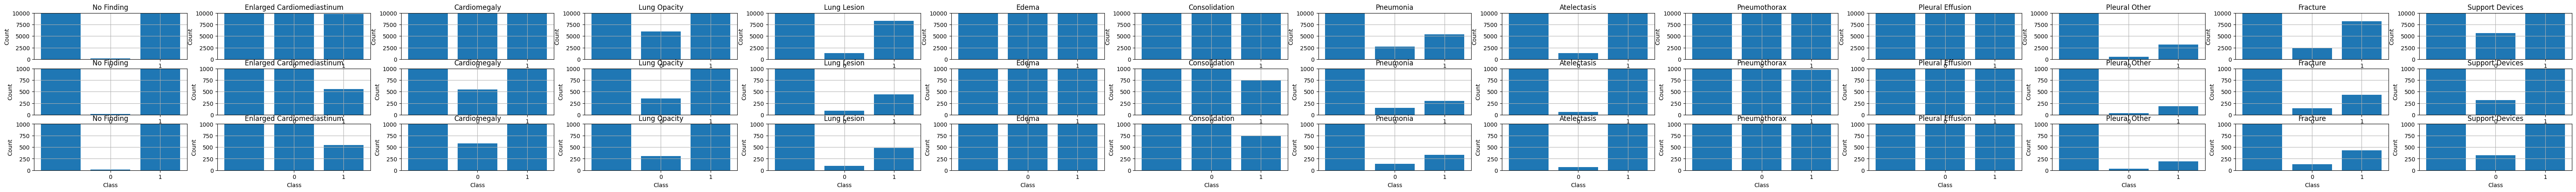

In [ ]:
# Plot the class distribution
fig, ax = plt.subplots(3, len(train_class_distribution), figsize=(80, 5))
for i, (key, value) in enumerate(train_class_distribution.items()):
    ax[0, i].bar(value.index, value.values)
    ax[0, i].set_title(key)
    ax[0, i].set_xlabel("Class")
    ax[0, i].set_ylabel("Count")
    ax[0, i].set_xticks([-1, 0, 1])
    ax[0, i].set_xticklabels(["-1", "0", "1"])
    ax[0, i].set_ylim(0, 10000)
    ax[0, i].grid()

for i, (key, value) in enumerate(valid_class_distribution.items()):
    ax[1, i].bar(value.index, value.values)
    ax[1, i].set_title(key)
    ax[1, i].set_xlabel("Class")
    ax[1, i].set_ylabel("Count")
    ax[1, i].set_xticks([0, 1])
    ax[1, i].set_xticklabels(["0", "1"])
    ax[1, i].set_ylim(0, 1000)
    ax[1, i].grid()

for i, (key, value) in enumerate(test_class_distribution.items()):
    ax[2, i].bar(value.index, value.values)
    ax[2, i].set_title(key)
    ax[2, i].set_xlabel("Class")
    ax[2, i].set_ylabel("Count")
    ax[2, i].set_xticks([0, 1])
    ax[2, i].set_xticklabels(["0", "1"])
    ax[2, i].set_ylim(0, 1000)
    ax[2, i].grid()

In [33]:
## Split and create .csv for the training of the segments 

train_df_ap = train_df[train_df['AP/PA'] == 'AP']
train_df_pa = train_df[train_df['AP/PA'] == 'PA']
valid_df_ap = valid_df[valid_df['AP/PA'] == 'AP']
valid_df_pa = valid_df[valid_df['AP/PA'] == 'PA']
test_df_ap = test_df[test_df['AP/PA'] == 'AP']
test_df_pa = test_df[test_df['AP/PA'] == 'PA']
train_df_fr = train_df[train_df['Frontal/Lateral'] == 'Frontal']
train_df_lat = train_df[train_df['Frontal/Lateral'] == 'Lateral']
valid_df_fr = valid_df[valid_df['Frontal/Lateral'] == 'Frontal']
valid_df_lat = valid_df[valid_df['Frontal/Lateral'] == 'Lateral']
test_df_fr = test_df[test_df['Frontal/Lateral'] == 'Frontal']
test_df_lat = test_df[test_df['Frontal/Lateral'] == 'Lateral']

In [16]:
train_class_distribution_ap = get_class_distribution(train_df_ap)
valid_class_distribution_ap = get_class_distribution(valid_df_ap)
test_class_distribution_ap = get_class_distribution(test_df_ap)
train_class_distribution_pa = get_class_distribution(train_df_pa)
valid_class_distribution_pa = get_class_distribution(valid_df_pa)
test_class_distribution_pa = get_class_distribution(test_df_pa)
train_class_distribution_fr = get_class_distribution(train_df_fr)
valid_class_distribution_fr = get_class_distribution(valid_df_fr)
test_class_distribution_fr = get_class_distribution(test_df_fr)
train_class_distribution_lat = get_class_distribution(train_df_lat)
valid_class_distribution_lat = get_class_distribution(valid_df_lat)
test_class_distribution_lat = get_class_distribution(test_df_lat)

# Print the number of samples in each split
print("All")
print(f"Train: {len(train_df)}")
print(f"Valid: {len(valid_df)}")
print(f"Test: {len(test_df)}")

print("AP")
print(f"Train AP: {len(train_df_ap)}")
print(f"Valid AP: {len(valid_df_ap)}")
print(f"Test AP: {len(test_df_ap)}")

print("PA")
print(f"Train PA: {len(train_df_pa)}")
print(f"Valid PA: {len(valid_df_pa)}")
print(f"Test PA: {len(test_df_pa)}")

print("Frontal")
print(f"Train Frontal: {len(train_df_fr)}")
print(f"Valid Frontal: {len(valid_df_fr)}")
print(f"Test Frontal: {len(test_df_fr)}")

print("Lateral")
print(f"Train Lateral: {len(train_df_lat)}")
print(f"Valid Lateral: {len(valid_df_lat)}")
print(f"Test Lateral: {len(test_df_lat)}")


All
Train: 201282
Valid: 11182
Test: 11183
AP
Train AP: 145588
Valid AP: 8133
Test AP: 8038
PA
Train PA: 26561
Valid PA: 1397
Test PA: 1494
Frontal
Train Frontal: 172166
Valid Frontal: 9530
Test Frontal: 9532
Lateral
Train Lateral: 29116
Valid Lateral: 1652
Test Lateral: 1651


In [34]:
# Define the path 
output_dir = os.path.join(cwd_path.parent, 'data', 'splitted', '90_5_5')

# Create the 'splitted' directory
os.makedirs(output_dir, exist_ok=True)

# Save these subsets to CSVs
train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
valid_df.to_csv(os.path.join(output_dir, 'valid.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)
train_df_ap.to_csv(os.path.join(output_dir, 'ap_train.csv'), index=False)
train_df_pa.to_csv(os.path.join(output_dir, 'pa_train.csv'), index=False)
valid_df_ap.to_csv(os.path.join(output_dir, 'ap_valid.csv'), index=False)
valid_df_pa.to_csv(os.path.join(output_dir, 'pa_valid.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)
train_df_fr.to_csv(os.path.join(output_dir, 'fr_train.csv'), index=False)
train_df_lat.to_csv(os.path.join(output_dir, 'lat_train.csv'), index=False)
valid_df_fr.to_csv(os.path.join(output_dir, 'fr_valid.csv'), index=False)
valid_df_lat.to_csv(os.path.join(output_dir, 'lat_valid.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)


print("Datasets have been saved.")

Datasets have been saved.


In [35]:
print(output_dir)

c:\Users\flobr\Documents\Code\Master\Semester_3\ADLM\Personalized_ML\data\splitted\90_5_5


# Dataset 2

In [16]:
cwd_path = Path.cwd()
metadata_path = cwd_path.parent.joinpath("../image_data/CheXpert-v1.0-small/train.csv")
val_path = cwd_path.parent.joinpath("../image_data/CheXpert-v1.0-small/valid.csv")
train_og = pd.read_csv(metadata_path)
print(f"Len train: {len(train_og)}")
val_og = pd.read_csv(val_path)
print(f"Len val: {len(val_og)}")
metadata = pd.concat([train_og, val_og])
print(f"Len metadata: {len(metadata)}")

# Removing the single 'Unknown' value in 'Sex' 
metadata = metadata[metadata['Sex'] != 'Unknown']

Len train: 223414
Len val: 234
Len metadata: 223648


In [17]:
# Define the columns to map NaN values to -1.0
columns_to_map = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", 
    "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", 
    "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", 
    "Pleural Other", "Fracture", "Support Devices"
]

# Use .loc[] to modify the original DataFrame
metadata.loc[:, columns_to_map] = metadata[columns_to_map].fillna(-1.0)

# Use .loc[] to modify the original DataFrame
train_og.loc[:, columns_to_map] = train_og[columns_to_map].fillna(-1.0)

# Use .loc[] to modify the original DataFrame
val_og.loc[:, columns_to_map] = val_og[columns_to_map].fillna(-1.0)

metadata['Sex_mapped'] = pd.factorize(metadata['Sex'])[0]
metadata['Frontal/Lateral_mapped'] = pd.factorize(metadata['Frontal/Lateral'])[0]
metadata['AP/PA_mapped'] = pd.factorize(metadata['AP/PA'])[0]

train_og["Sex_mapped"] = pd.factorize(train_og['Sex'])[0]
train_og['Frontal/Lateral_mapped'] = pd.factorize(train_og['Frontal/Lateral'])[0]
train_og['AP/PA_mapped'] = pd.factorize(train_og['AP/PA'])[0]

val_og["Sex_mapped"] =  pd.factorize(val_og['Sex'])[0]
val_og['Frontal/Lateral_mapped'] = pd.factorize(val_og['Frontal/Lateral'])[0]
val_og['AP/PA_mapped'] = pd.factorize(val_og['AP/PA'])[0]

In [18]:
# How many rows are in the training set where ateletasis is not -1, consolidation is not -1, and edema is not -1, pleural effusion is not -1, and cardiomegaly is not -1
print(f"Train og Samples: {len(train_og)}")
valid_samples = train_og[
    (train_og['Atelectasis'] != -1) & 
    (train_og['Consolidation'] != -1) & 
    (train_og['Edema'] != -1) & 
    (train_og['Pleural Effusion'] != -1) & 
    (train_og['Cardiomegaly'] != -1)
]
# Drop valid samples from train_og
train_og = train_og.drop(valid_samples.index)

print(f"Valid Samples: {len(valid_samples)}")
print(f"Train Samples: {len(train_og)}")

Train og Samples: 223414
Valid Samples: 198
Train Samples: 223216


In [19]:
# Split valid samples into ap, pa, frontal, and lateral
valid_samples_ap = valid_samples[valid_samples['AP/PA'] == 'AP']
valid_samples_pa = valid_samples[valid_samples['AP/PA'] == 'PA']
valid_samples_fr = valid_samples[valid_samples['Frontal/Lateral'] == 'Frontal']
valid_samples_lat = valid_samples[valid_samples['Frontal/Lateral'] == 'Lateral']

print(f"Valid Samples AP: {len(valid_samples_ap)}")
print(f"Valid Samples PA: {len(valid_samples_pa)}")
print(f"Valid Samples Frontal: {len(valid_samples_fr)}")
print(f"Valid Samples Lateral: {len(valid_samples_lat)}")

Valid Samples AP: 132
Valid Samples PA: 29
Valid Samples Frontal: 161
Valid Samples Lateral: 37


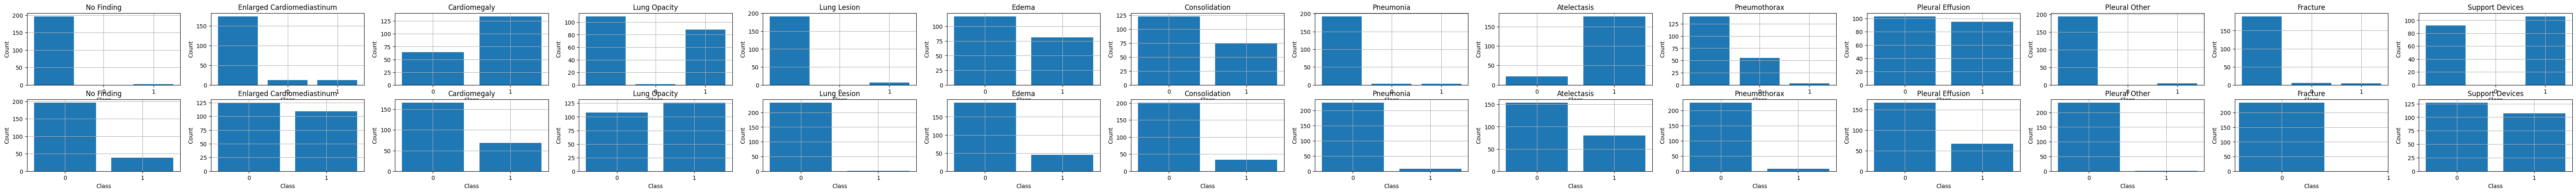

In [20]:
valid_samples_class_distribution = get_class_distribution(valid_samples)
valid_valid_class_distribution = get_class_distribution(val_og)

# Plot the class distribution
fig, ax = plt.subplots(2, len(valid_samples_class_distribution), figsize=(80, 5))

for i, (key, value) in enumerate(valid_samples_class_distribution.items()):
    ax[0, i].bar(value.index, value.values)
    ax[0, i].set_title(key)
    ax[0, i].set_xlabel("Class")
    ax[0, i].set_ylabel("Count")
    ax[0, i].set_xticks([0, 1])
    ax[0, i].set_xticklabels(["0", "1"])
    ax[0, i].grid()

for i, (key, value) in enumerate(valid_valid_class_distribution.items()):
    ax[1, i].bar(value.index, value.values)
    ax[1, i].set_title(key)
    ax[1, i].set_xlabel("Class")
    ax[1, i].set_ylabel("Count")
    ax[1, i].set_xticks([0, 1])
    ax[1, i].set_xticklabels(["0", "1"])
    ax[1, i].grid()


In [ ]:
# Define the path 
output_dir = os.path.join(cwd_path.parent, 'data', 'only_valid_samples')

# Create the 'splitted' directory
os.makedirs(output_dir, exist_ok=True)

train_df = train_og
valid_df = val_og
test_df = valid_samples

# Save these subsets to CSVs
train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
valid_df.to_csv(os.path.join(output_dir, 'valid.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)

train_df_ap = train_df[train_df['AP/PA'] == 'AP']
train_df_pa = train_df[train_df['AP/PA'] == 'PA']
valid_df_ap = valid_df[valid_df['AP/PA'] == 'AP']
valid_df_pa = valid_df[valid_df['AP/PA'] == 'PA']
test_df_ap = test_df[test_df['AP/PA'] == 'AP']
test_df_pa = test_df[test_df['AP/PA'] == 'PA']
train_df_fr = train_df[train_df['Frontal/Lateral'] == 'Frontal']
train_df_lat = train_df[train_df['Frontal/Lateral'] == 'Lateral']
valid_df_fr = valid_df[valid_df['Frontal/Lateral'] == 'Frontal']
valid_df_lat = valid_df[valid_df['Frontal/Lateral'] == 'Lateral']
test_df_fr = test_df[test_df['Frontal/Lateral'] == 'Frontal']
test_df_lat = test_df[test_df['Frontal/Lateral'] == 'Lateral']

train_df_ap.to_csv(os.path.join(output_dir, 'ap_train.csv'), index=False)
train_df_pa.to_csv(os.path.join(output_dir, 'pa_train.csv'), index=False)
valid_df_ap.to_csv(os.path.join(output_dir, 'ap_valid.csv'), index=False)
valid_df_pa.to_csv(os.path.join(output_dir, 'pa_valid.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)
test_df_pa.to_csv(os.path.join(output_dir, 'pa_test.csv'), index=False)
train_df_fr.to_csv(os.path.join(output_dir, 'fr_train.csv'), index=False)
train_df_lat.to_csv(os.path.join(output_dir, 'lat_train.csv'), index=False)
valid_df_fr.to_csv(os.path.join(output_dir, 'fr_valid.csv'), index=False)
valid_df_lat.to_csv(os.path.join(output_dir, 'lat_valid.csv'), index=False)
test_df_fr.to_csv(os.path.join(output_dir, 'fr_test.csv'), index=False)
test_df_lat.to_csv(os.path.join(output_dir, 'lat_test.csv'), index=False)

print("Datasets have been saved.")
print(f"Train len: {len(train_df)}")
print(f"Test len: {len(test_df)}")
print(f"Valid len: {len(valid_df)}")

Datasets have been saved.
Train len: 223216
Test len: 198
Valid len: 234


# Data mapping original data

In [11]:
cwd_path = Path.cwd()
train_path = cwd_path.parent.joinpath("data/original_data_unprocessed/train.csv")
val_path = cwd_path.parent.joinpath("data/original_data_unprocessed/valid.csv")
test_path = cwd_path.parent.joinpath("data/original_data_unprocessed//test.csv")
train_og = pd.read_csv(train_path)
print(f"Len train: {len(train_og)}")
val_og = pd.read_csv(val_path)
print(f"Len val: {len(val_og)}")
test_og = pd.DataFrame()
temp_test = pd.read_csv(test_path, header=None)
# First assign the available columns from the test file.
temp_test.columns = ['Path'] + columns_to_map  # This gives 1 + 14 = 15 columns

# Then add the missing columns with NaN values.
temp_test['Sex'] = np.nan
temp_test['Age'] = np.nan
temp_test['Frontal/Lateral'] = np.nan
temp_test['AP/PA'] = np.nan

# Finally, reorder the columns to match the expected order from val_og.
expected_cols = ['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'] + columns_to_map
temp_test = temp_test[expected_cols]
temp_test.to_csv(test_path, index=False)
test_og = pd.read_csv(test_path)
print(f"Len metadata: {len(test_og)}")

# Removing the single 'Unknown' value in 'Sex' 
train_og = train_og[train_og['Sex'] != 'Unknown']




Len train: 223414
Len val: 234
Len metadata: 669


In [12]:
# Define the columns to map NaN values to -1.0
columns_to_map = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", 
    "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", 
    "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", 
    "Pleural Other", "Fracture", "Support Devices"
]


for data in [train_og, val_og, test_og]:
    # Use .loc[] to modify the original DataFrame
    data.loc[:, columns_to_map] = data[columns_to_map].fillna(-1.0)

    data['Sex_mapped'] = pd.factorize(data['Sex'])[0]
    data['Frontal/Lateral_mapped'] = pd.factorize(data['Frontal/Lateral'])[0]
    data['AP/PA_mapped'] = pd.factorize(data['AP/PA'])[0]

In [16]:
# Define the path 
output_dir = os.path.join(cwd_path.parent, 'data', 'original_data')

# Create the 'splitted' directory
os.makedirs(output_dir, exist_ok=True)

train_df = train_og
valid_df = val_og
test_df = test_og[1:]

# Save these subsets to CSVs
train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
valid_df.to_csv(os.path.join(output_dir, 'valid.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)

train_df_ap = train_df[train_df['AP/PA'] == 'AP']
train_df_pa = train_df[train_df['AP/PA'] == 'PA']
valid_df_ap = valid_df[valid_df['AP/PA'] == 'AP']
valid_df_pa = valid_df[valid_df['AP/PA'] == 'PA']
test_df_ap = test_df[test_df['AP/PA'] == 'AP']
test_df_pa = test_df[test_df['AP/PA'] == 'PA']
train_df_fr = train_df[train_df['Frontal/Lateral'] == 'Frontal']
train_df_lat = train_df[train_df['Frontal/Lateral'] == 'Lateral']
valid_df_fr = valid_df[valid_df['Frontal/Lateral'] == 'Frontal']
valid_df_lat = valid_df[valid_df['Frontal/Lateral'] == 'Lateral']
test_df_fr = test_df[test_df['Frontal/Lateral'] == 'Frontal']
test_df_lat = test_df[test_df['Frontal/Lateral'] == 'Lateral']

train_df_ap.to_csv(os.path.join(output_dir, 'ap_train.csv'), index=False)
train_df_pa.to_csv(os.path.join(output_dir, 'pa_train.csv'), index=False)
valid_df_ap.to_csv(os.path.join(output_dir, 'ap_valid.csv'), index=False)
valid_df_pa.to_csv(os.path.join(output_dir, 'pa_valid.csv'), index=False)
test_df_ap.to_csv(os.path.join(output_dir, 'ap_test.csv'), index=False)
test_df_pa.to_csv(os.path.join(output_dir, 'pa_test.csv'), index=False)
train_df_fr.to_csv(os.path.join(output_dir, 'fr_train.csv'), index=False)
train_df_lat.to_csv(os.path.join(output_dir, 'lat_train.csv'), index=False)
valid_df_fr.to_csv(os.path.join(output_dir, 'fr_valid.csv'), index=False)
valid_df_lat.to_csv(os.path.join(output_dir, 'lat_valid.csv'), index=False)
test_df_fr.to_csv(os.path.join(output_dir, 'fr_test.csv'), index=False)
test_df_lat.to_csv(os.path.join(output_dir, 'lat_test.csv'), index=False)

print("Datasets have been saved.")
print(f"Train len: {len(train_df)}")
print(f"Test len: {len(test_df)}")
print(f"Valid len: {len(valid_df)}")

Datasets have been saved.
Train len: 223413
Test len: 668
Valid len: 234
